In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [22]:
df = pd.read_csv("/home/taewan/time_parser_log.csv")
df


,topic,bag_time,header_stamp
0,/camera_1/compressed,1.751954e+09,1.751954e+09
1,/camera_1/compressed,1.751954e+09,1.751954e+09
2,/camera_1/compressed,1.751954e+09,1.751954e+09
3,/camera_1/compressed,1.751954e+09,1.751954e+09
4,/camera_1/compressed,1.751954e+09,1.751954e+09
...,...,...,...
65871,/post_fusion_object,1.751954e+09,1.751954e+09
65872,/post_fusion_object,1.751954e+09,1.751954e+09
65873,/post_fusion_object,1.751954e+09,1.751954e+09
65874,/post_fusion_object,1.751954e+09,1.751954e+09


1751954166.726045


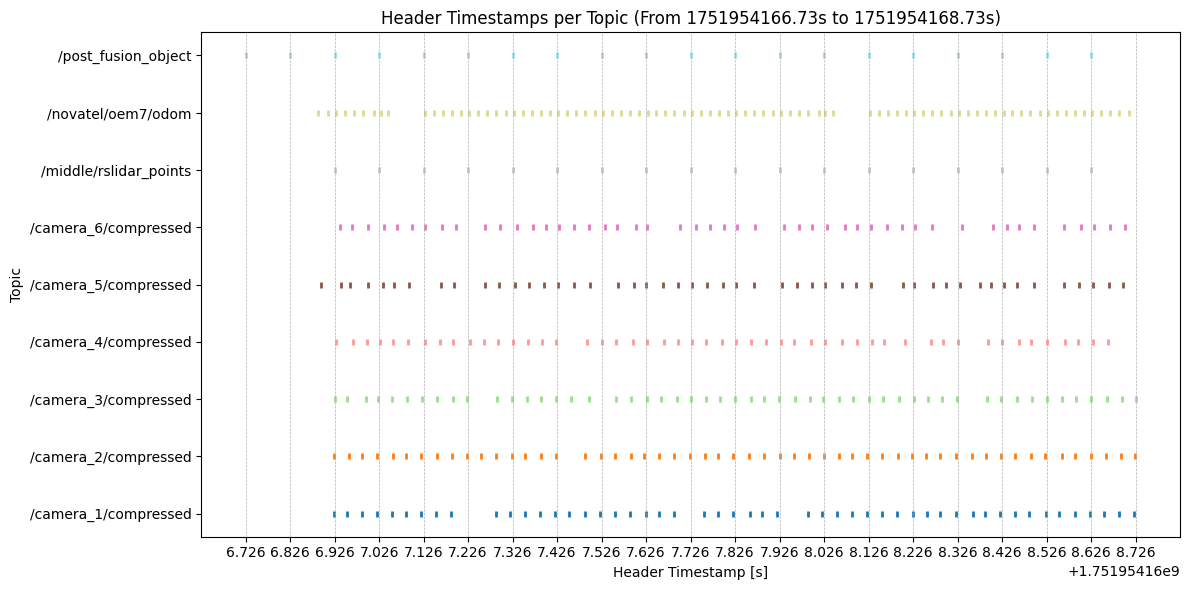

In [21]:

# ✅ 시간 범위 지정
t_start = df["header_stamp"].min()
print(t_start)
t_range = 2.0
df = df[(df["header_stamp"] >= t_start) & (df["header_stamp"] < t_start + t_range)]

# topic 인덱스 매핑
topic_list = sorted(df["topic"].unique())
topic_to_y = {topic: i for i, topic in enumerate(topic_list)}

plt.figure(figsize=(12, 6))
cmap = cm.get_cmap('tab20', len(topic_list))

for i, topic in enumerate(topic_list):
    topic_df = df[df["topic"] == topic]
    y_pos = np.full(len(topic_df), topic_to_y[topic])
    plt.scatter(
        topic_df["header_stamp"],
        y_pos,
        s=20,
        color=cmap(i),
        label=topic,
        marker='|',
        linewidths=2
    )

# ✅ X축 기준선(그리드) 촘촘하게: 0.1초 간격
tick_step = 0.1
ticks = np.arange(t_start, t_start + t_range + tick_step, tick_step)
plt.xticks(ticks)

plt.yticks(list(topic_to_y.values()), list(topic_to_y.keys()))
plt.xlabel("Header Timestamp [s]")
plt.ylabel("Topic")
plt.title(f"Header Timestamps per Topic (From {t_start:.2f}s to {t_start + t_range:.2f}s)")
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

1751954306.6337898


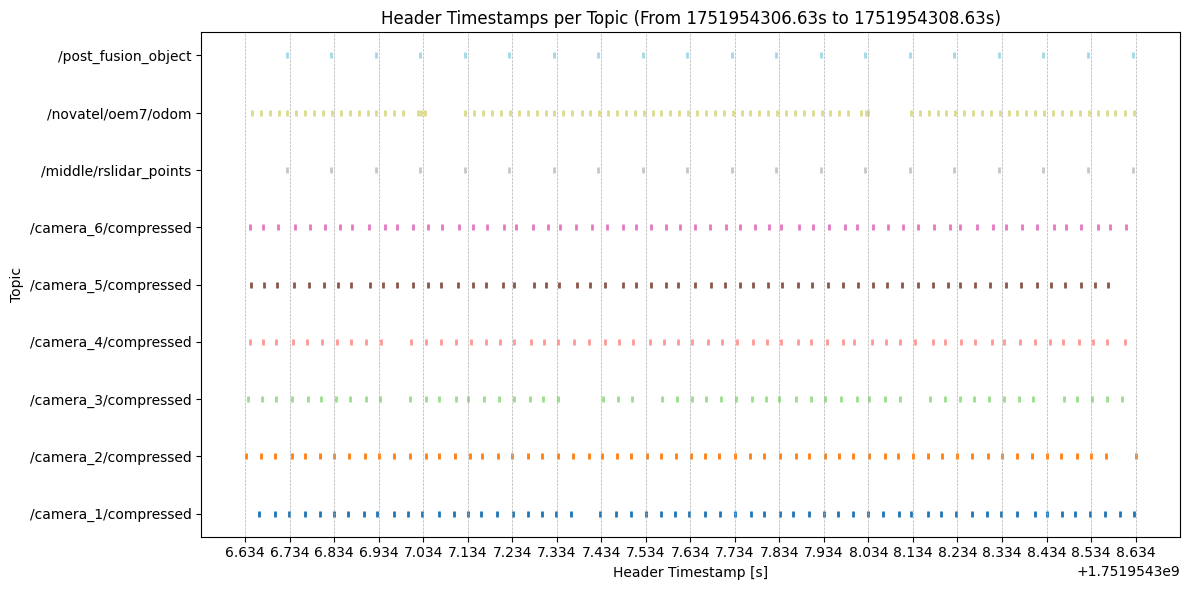

In [23]:

# ✅ 시간 범위 지정
t_start = df["header_stamp"].mean()
print(t_start)
t_range = 2.0
df = df[(df["header_stamp"] >= t_start) & (df["header_stamp"] < t_start + t_range)]

# topic 인덱스 매핑
topic_list = sorted(df["topic"].unique())
topic_to_y = {topic: i for i, topic in enumerate(topic_list)}

plt.figure(figsize=(12, 6))
cmap = cm.get_cmap('tab20', len(topic_list))

for i, topic in enumerate(topic_list):
    topic_df = df[df["topic"] == topic]
    y_pos = np.full(len(topic_df), topic_to_y[topic])
    plt.scatter(
        topic_df["header_stamp"],
        y_pos,
        s=20,
        color=cmap(i),
        label=topic,
        marker='|',
        linewidths=2
    )

# ✅ X축 기준선(그리드) 촘촘하게: 0.1초 간격
tick_step = 0.1
ticks = np.arange(t_start, t_start + t_range + tick_step, tick_step)
plt.xticks(ticks)

plt.yticks(list(topic_to_y.values()), list(topic_to_y.keys()))
plt.xlabel("Header Timestamp [s]")
plt.ylabel("Topic")
plt.title(f"Header Timestamps per Topic (From {t_start:.2f}s to {t_start + t_range:.2f}s)")
plt.grid(True, axis='x', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()